In [10]:
%run dataset.py
%matplotlib inline

from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
import numpy as np
from PIL import ImageStat
import matplotlib.pyplot as plt
import random

In [2]:
dataset = CXRDataset('dataset', dataset_type='train')

mean = np.zeros(3)
for i in range(len(dataset)):
    image = dataset[i][0]
    stat = ImageStat.Stat(image)
    mean += np.array(stat.mean)
    print('\r{:.2f}%'.format(100*i/len(dataset)), end='\r')
mean /= len(dataset)*255
print(mean)

[ 0.50576189  0.50576189  0.50576189]


In [27]:
def show_tensor_image(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.50576189, 0.50576189, 0.50576189])
    inp = inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

In [39]:
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.50576189, 0.50576189, 0.50576189], [1., 1., 1.])
])
dataset = CXRDataset('dataset', dataset_type='train', transform=trans)
dataloader = DataLoader(dataset, batch_size=5, shuffle=True, num_workers=4)
images, labels, names = next(iter(dataloader))
label_string = []
for label in labels:
    t = ''
    for i, d in enumerate(label):
        if d == 1: t += dataset.classes[i]+'|'
    if t == '': t = 'no finding'
    else: t = t[:-1]
    label_string.append(t)

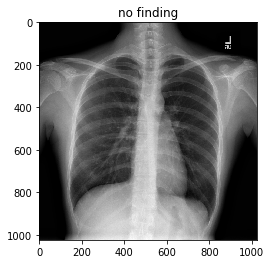

In [40]:
show_tensor_image(images[0], title=label_string[0])

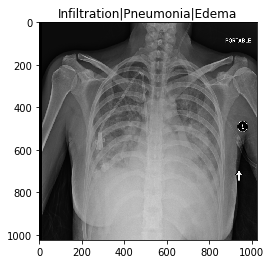

In [41]:
show_tensor_image(images[1], title=label_string[1])

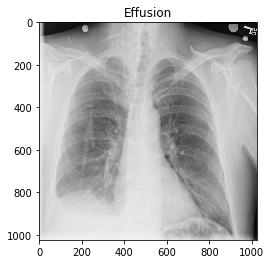

In [42]:
show_tensor_image(images[2], title=label_string[2])

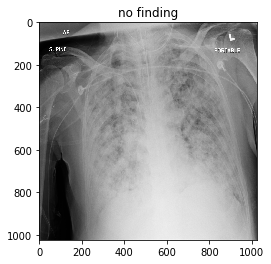

In [43]:
show_tensor_image(images[3], title=label_string[3])

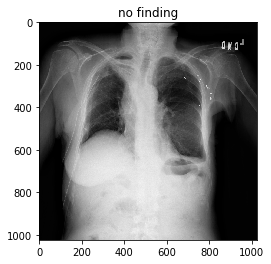

In [33]:
show_tensor_image(images[4], title=label_string[4])

In [44]:
print(images)
print(labels)
print(names)

tensor([[[[-0.4979, -0.4979, -0.4979,  ..., -0.4979, -0.4979, -0.4979],
          [-0.4979, -0.4979, -0.4979,  ..., -0.4979, -0.4979, -0.4979],
          [-0.4979, -0.4979, -0.4979,  ..., -0.4979, -0.4979, -0.4979],
          ...,
          [-0.4430, -0.4430, -0.4430,  ..., -0.4705, -0.4744, -0.4705],
          [-0.4352, -0.4391, -0.4391,  ..., -0.4665, -0.4705, -0.4665],
          [-0.4273, -0.4313, -0.4313,  ..., -0.4626, -0.4626, -0.4626]],

         [[-0.4979, -0.4979, -0.4979,  ..., -0.4979, -0.4979, -0.4979],
          [-0.4979, -0.4979, -0.4979,  ..., -0.4979, -0.4979, -0.4979],
          [-0.4979, -0.4979, -0.4979,  ..., -0.4979, -0.4979, -0.4979],
          ...,
          [-0.4430, -0.4430, -0.4430,  ..., -0.4705, -0.4744, -0.4705],
          [-0.4352, -0.4391, -0.4391,  ..., -0.4665, -0.4705, -0.4665],
          [-0.4273, -0.4313, -0.4313,  ..., -0.4626, -0.4626, -0.4626]],

         [[-0.4979, -0.4979, -0.4979,  ..., -0.4979, -0.4979, -0.4979],
          [-0.4979, -0.4979, -

In [49]:
datasets = {x: CXRDataset('dataset', dataset_type=x, transform=trans) for x in ['train', 'val', 'test']}
print(dataset.classes)
for x in ['train', 'val', 'test']:
    print('%s: %d'%(x, len(datasets[x])))

['Atelectasis' 'Cardiomegaly' 'Effusion' 'Infiltration' 'Mass' 'Nodule'
 'Pneumonia' 'Pneumothorax' 'Consolidation' 'Edema' 'Emphysema' 'Fibrosis'
 'Pleural_Thickening' 'Hernia']
train: 75714
val: 10810
test: 25596
